# supervisado 

## regresion logistica
* Utilizar muchas variables
* regularizacion


In [23]:
! pip install kaleido

  Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl (85.2 MB)


In [77]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [78]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

In [79]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [80]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C320 4dr,Sedan,Asia,Front,"$35,940",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [81]:
df["EnvFriendly"] = df[["MPG_City","MPG_Highway"]]\
    .apply(lambda x: 1 if x["MPG_City"]>=21 and x["MPG_Highway"]>=23 else 0, axis=1)

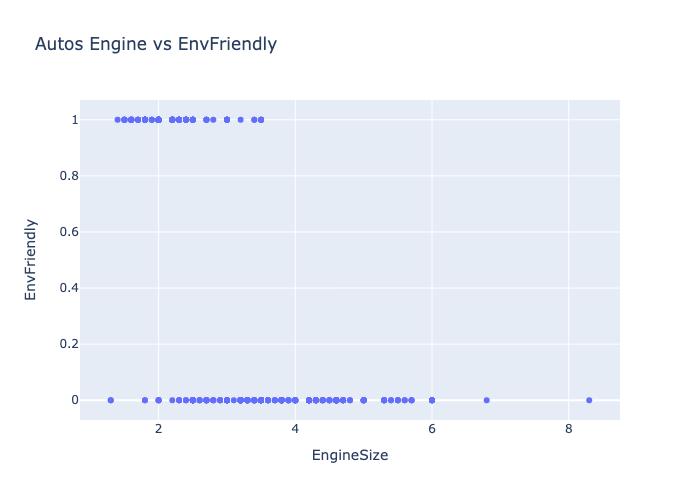

In [82]:
fig = px.scatter(df[["EngineSize","EnvFriendly"]], x="EngineSize", y="EnvFriendly", 
                 title="Autos Engine vs EnvFriendly"
                )
display_static(fig)

In [83]:
pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Type_nan,Origin_Europe,Origin_USA,Origin_nan,DriveTrain_Front,DriveTrain_Rear,DriveTrain_nan
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,1,0,0,1,0,0
8,0,1,0,0,0,0,1,0,0,1,0,0
9,0,1,0,0,0,0,1,0,0,1,0,0


In [97]:
df_x = pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)
df_x = pd.concat((df_x, df), axis=1)
cols = [c for c in df_x.columns if c.startswith("Type_") or c.startswith("Origin_") or c.startswith("DriveTrain_")]
cols = cols + ["Invoice","EngineSize","Cylinders","Horsepower","Weight","Wheelbase","Length","EnvFriendly"]
df_x = df_x[cols].fillna(0)
y = df_x['EnvFriendly']
cols.remove("EnvFriendly")
X = df_x[cols]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [98]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.Logit(y_train, X_train).fit(method='bfgs',maxiter=10000)
model.summary()

Optimization terminated successfully.
         Current function value: 0.188865
         Iterations: 168
         Function evaluations: 184
         Gradient evaluations: 174


/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            EnvFriendly   No. Observations:                  342
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                  0.7023
Time:                        23:32:05   Log-Likelihood:                -64.592
converged:                       True   LL-Null:                       -216.99
Covariance Type:            nonrobust   LLR p-value:                 2.593e-55
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               50.5926        nan        nan        nan         nan         nan
Type_SUV           -22.4061        nan        nan        nan         nan         nan
Type_Sedan         -21.4229        nan        nan        nan         nan         nan
Type_Sports        -22.7597        nan        nan        nan         nan         nan
Type_Truck         -20.1339        nan        nan        nan         nan         nan
Type_Wagon         -21.0092        nan        nan        nan         nan         nan
Type_nan                  0        nan        nan        nan         nan         nan
Origin_Europe        0.5195        nan        nan        nan         nan         nan
Origin_USA          -0.6784        nan        nan        nan         nan         nan
Origin_nan                0        nan        nan        nan         nan         nan
DriveTrain_Front     1.1718        nan        nan        nan         nan         nan
DriveTrain_Rear     -1.4501        nan        nan        nan         nan         nan
DriveTrain_nan            0        nan        nan        nan         nan         nan
Invoice          -2.429e-05        nan        nan        nan         nan         nan
EngineSize           0.5115        nan        nan        nan         nan         nan
Cylinders           -0.7948        nan        nan        nan         nan         nan
Horsepower          -0.0167        nan        nan        nan         nan         nan
Weight              -0.0048        nan        nan        nan         nan         nan
Wheelbase           -0.1269        nan        nan        nan         nan         nan
Length               0.0328        nan        nan        nan         nan         nan
====================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [99]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_train)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_train)])/len(y_hat)

0.9035087719298246

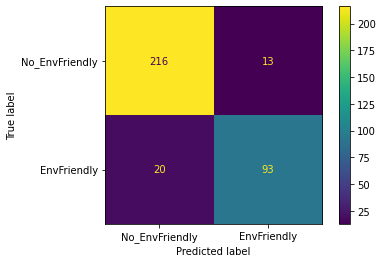

In [100]:
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No_EnvFriendly","EnvFriendly"])
disp.plot()

In [101]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_test)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_test)])/len(y_hat)

0.8837209302325582

## Using sklearn
Crear un modelo solo con 2 variables

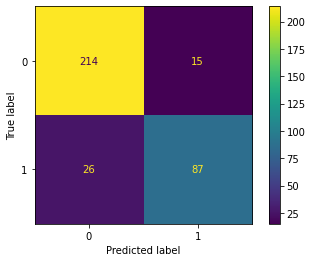

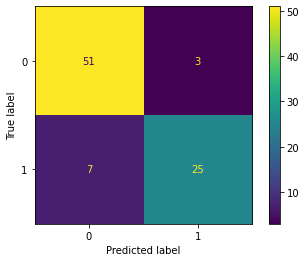

In [103]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(solver='lbfgs').fit(X_train[["EngineSize","Weight"]], y_train)
clf.coef_
y_hat = clf.predict(X_train[["EngineSize","Weight"]])
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
cm = confusion_matrix(y_test, clf.predict(X_test[["EngineSize","Weight"]]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()


In [104]:
x_p = X_train["EngineSize"].values
y_p = X_train["Weight"].values
x2, y2 = np.mgrid[0:9, 2000:6000]
z_cat = np.apply_along_axis(lambda x:clf.predict([x]),0,np.stack((x2,y2)))[0]

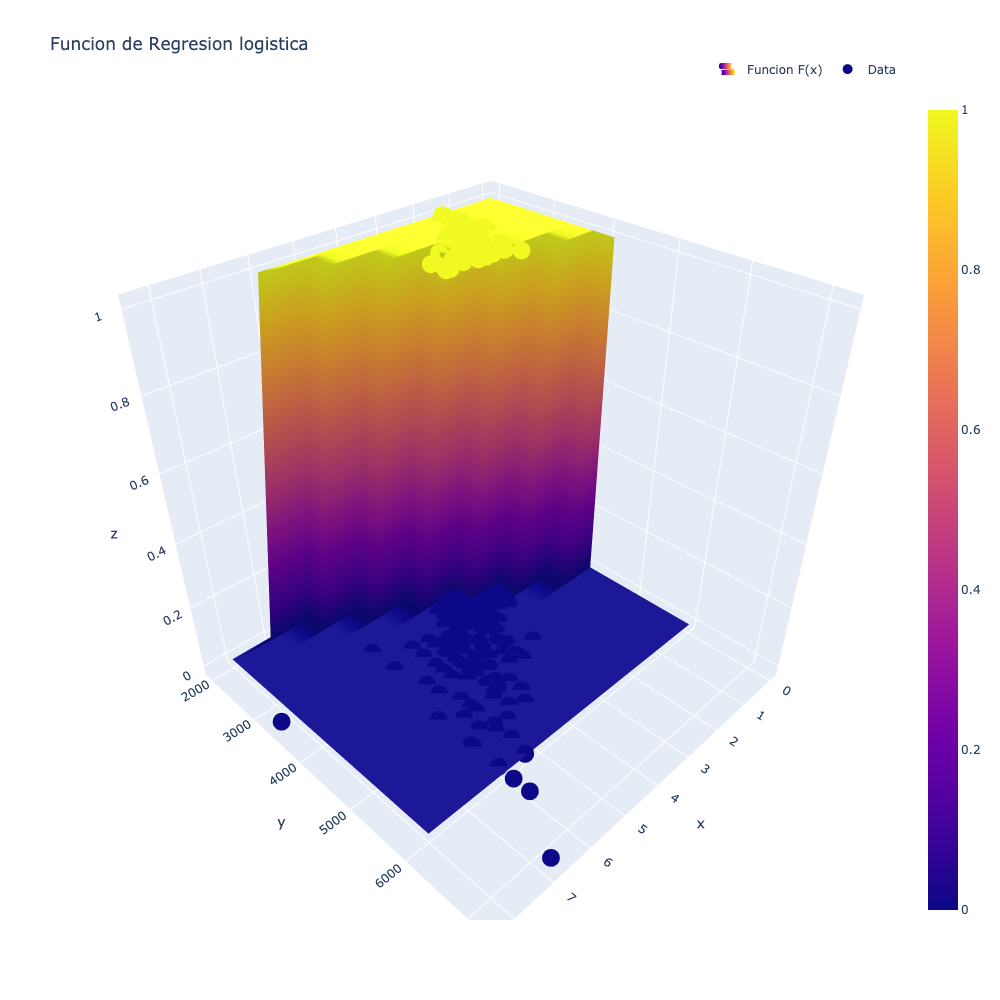

In [105]:
layout = go.Layout(
        title='Funcion de Regresion logistica',
        autosize=False,
        width=1000,
        height=1000,
        showlegend = True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
     xaxis_title="EngineSize",
     yaxis_title="Weight"
)

fig = go.Figure()
fig.add_trace(
    go.Surface(z=z_cat, x=x2, y=y2, name='Funcion F(x)')
)
fig.add_trace(
    go.Scatter3d(
        x=x_p,
        y=y_p,
        z=y_train,
        mode ='markers',
        marker=dict(
        size=10,
        color=y_train
    ),
    name='Data')
)
fig.update_layout(
    layout
)
fig['data'][0]['showlegend']=True
fig['data'][1]['showlegend']=True
display_static(fig)

## Implementar K-fold
Utilizar las librerias para generar 5 muestras de datos con training y test, utilizando la misma fuente de datos

In [106]:
from sklearn.model_selection import ShuffleSplit

In [107]:
rs = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
list(rs.split(X_train))

[(array([ 33, 321, 106,  34, 308,  97,  85, 204, 210, 158,  45, 134, 220,
         311, 236, 234, 108, 230,  90,  46, 269, 331, 226,  73, 334, 324,
         142, 144,  29, 214, 278,  27, 198, 299, 146, 164, 173, 212, 218,
          35, 260, 305, 200, 199,  44, 168, 129,  93, 111, 216, 338,  18,
         224,  79, 266,  71, 194, 286, 328, 263, 160, 217, 161,  83, 339,
         118, 310, 319, 110, 336, 157, 152,  16,  75, 109, 239, 219, 139,
           4,  96, 225,  61,  67, 270, 154, 191, 261, 208, 318,  40, 253,
          13, 107, 259,   3, 215, 125,  24,  30,  77, 188, 184, 316, 255,
         252,  19, 291, 293, 182, 303,  80,  51,   2,  11, 104, 245,  86,
          10,  36, 325,  58,  41,  14, 155,  50, 209, 268, 282, 322, 281,
         335, 123, 222, 274,  62, 258, 332, 130, 187,  23, 249, 186,  43,
         114, 138,   0, 272, 201, 149, 231, 112, 205, 287,  98, 178, 256,
          94, 326,  95, 298, 169,  69,  48, 207, 227, 148, 143, 180, 131,
         304, 340, 262, 203,  84, 121,

## Utilizar regresion con regularizador

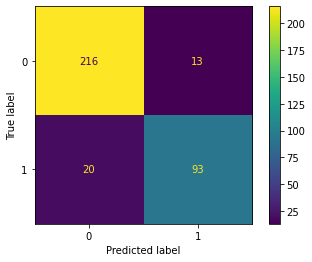

In [115]:
from sklearn.linear_model import Ridge, RidgeClassifier
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
clf = RidgeClassifier(alpha=1.0)
clf.fit(X_train, y_train) 
y_hat = clf.predict(X_train)
y_hat_test = clf.predict(X_test)
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()